More about the DataDrivenConstruction project: https://DataDrivenConstruction.io/
![](https://DataDrivenConstruction.io/wp-content/uploads/2022/09/Design-ohne-Titel-10.gif)

To work with data in Jupyter Notebook, we first need to **load the project dataset** obtained during conversion (in this case, it is the rac_basic_sampe.rvt project)

In [21]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
df = pd.read_csv('C:\DataDrivenConstruction\DATA\Reports\RVT/rac_basic_sample_project_rvt.json.csv', low_memory=False)

In [22]:
df.head()  #Show the first 5 lines of the Dataframe

,Unnamed: 0,Design Option,Category,Family,Type,Family and Type,Type Id,Phase Created,Phase Demolished,Area,...,Maximum Ridge Height,Show Capital,Show Drop Panel,Capital Top Offset,Height 1,Work Plane,Sofa Material,Stand,Gross Surface Area,Gross Volume
0,176804,None,OST_Floors,Generic 150mm,Generic 150mm,Generic 150mm,Generic 150mm,Working Drawings,None,106 m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,418183,None,OST_Floors,Generic 300,Generic 300,Generic 300,Generic 300,Working Drawings,None,100 m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,495352,None,OST_Floors,Concrete-Domestic 425mm,Concrete-Domestic 425mm,Concrete-Domestic 425mm,Concrete-Domestic 425mm,Working Drawings,None,38 m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,512683,None,OST_Floors,Timber Suspended Floor,Timber Suspended Floor,Timber Suspended Floor,Timber Suspended Floor,Working Drawings,None,74 m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,549031,None,OST_Floors,Generic 300,Generic 300,Generic 300,Generic 300,Working Drawings,None,9 m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Write parameters into the variables
parameter_1 = 'Type Name'
parameter_2 = 'Volume'

#Summing the entire project for one parameter and summing values in another parameter
dfg = df.groupby(parameter_1)[parameter_2].sum()
dfg

Type Name
01 Cotton                                                                                                                    0
0810mm                                                                                                                 0.05 m³
1800 x 900 mm                                                                                                   0.07 m³0.07 m³
4500_Kitchen Island_DW                                                                                                 2.33 m³
5000L 3500x900x1860                                                                                             5.54 m³5.54 m³
600 x 600 x 900mm                                                            0.11 m³0.11 m³0.11 m³0.11 m³0.11 m³0.11 m³0.11 m³
9 Meters High                                                                                            0.24 m³0.24 m³0.24 m³
Alex                                                                                                 

In [14]:
#Group the project by the number of elements in the group
dfcc = df.groupby(parameter_1)[parameter_2].count()
dfcc

Type Name
01 Cotton                                                                     0
0810mm                                                                        1
1800 x 900 mm                                                                 2
4500_Kitchen Island_DW                                                        1
5000L 3500x900x1860                                                           2
600 x 600 x 900mm                                                             7
9 Meters High                                                                 3
Alex                                                                          0
Bar Chair                                                                     6
CL_W1                                                                         0
Cavity wall_sliders                                                           0
Chrome-Polished_Chrome-CP                                                     1
Default                       

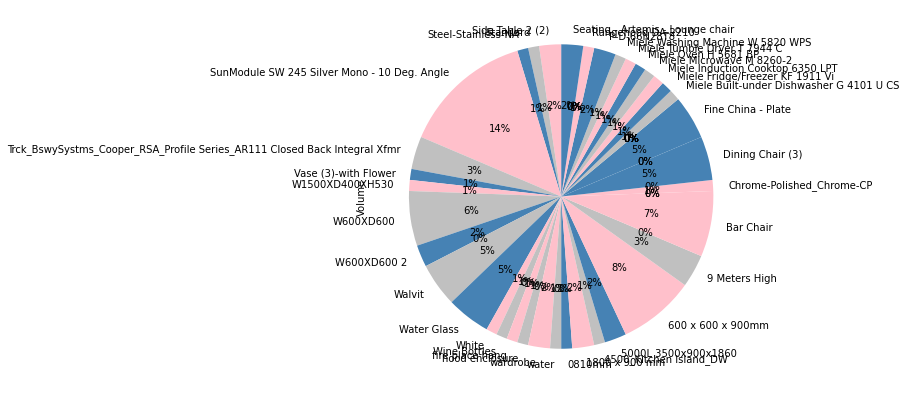

In [15]:
import matplotlib.pyplot as plt

colors_n1 = ['silver', 'steelblue', 'pink']
plot_n1 = dfcc.plot(kind='pie', figsize=(7, 7), autopct='%1.0f%%',colors=colors_n1, startangle=270)
plt.savefig('table_pie1.png', bbox_inches = 'tight') #Save as PNG in Output folder (->)

<AxesSubplot:ylabel='Type Name'>

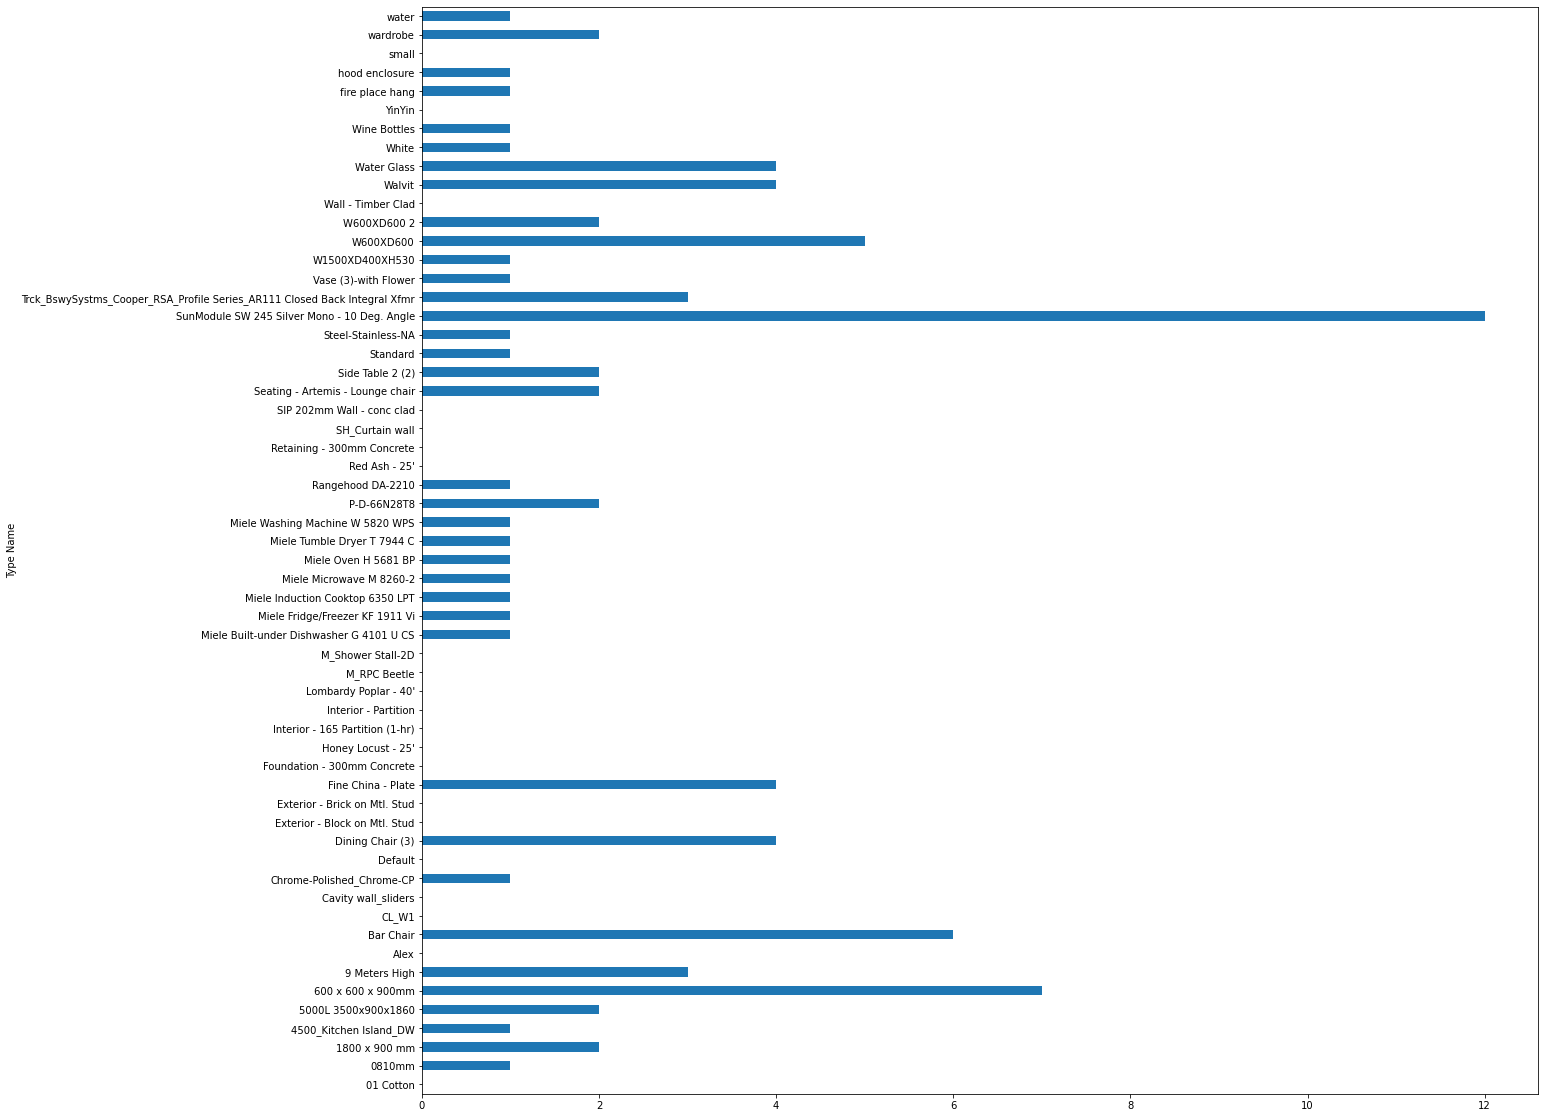

In [17]:
# Visualizing data from the Dataframe
dfcc.plot.barh(figsize=(20,20))

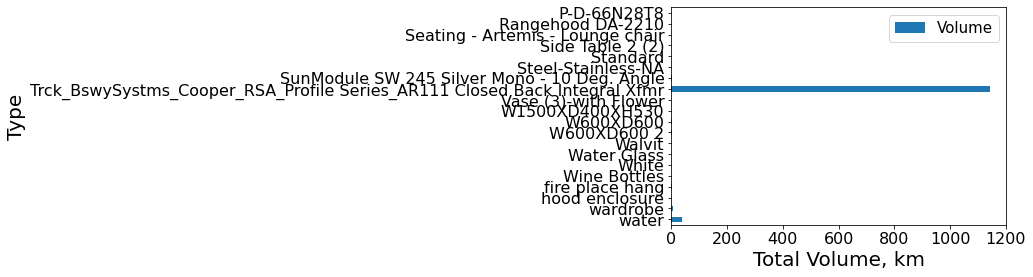

In [18]:
# Let's form a graph with only non-zero values

parameter_2 = 'Volume'
x_label = 'Total ' + parameter_2 +', km'

dfcc = dfcc.rename('Count')
df2 = pd.concat([dfg, dfcc], axis = 1)
df2 = df2[(df2.T != 0).any()]
df2 = df2.sort_values(parameter_1, ascending=False)
ax1 = df2.iloc[:20,:].plot(y=[parameter_2], kind="barh", fontsize = 16)
ax1.legend(fontsize = 15)
ax1.set_ylabel('Type', fontdict={'fontsize':20})
ax1.set_xlabel(x_label, fontdict={'fontsize':20})
plt.savefig('table_vol1.png', bbox_inches = 'tight') #Save as PNG in Output folder (->)

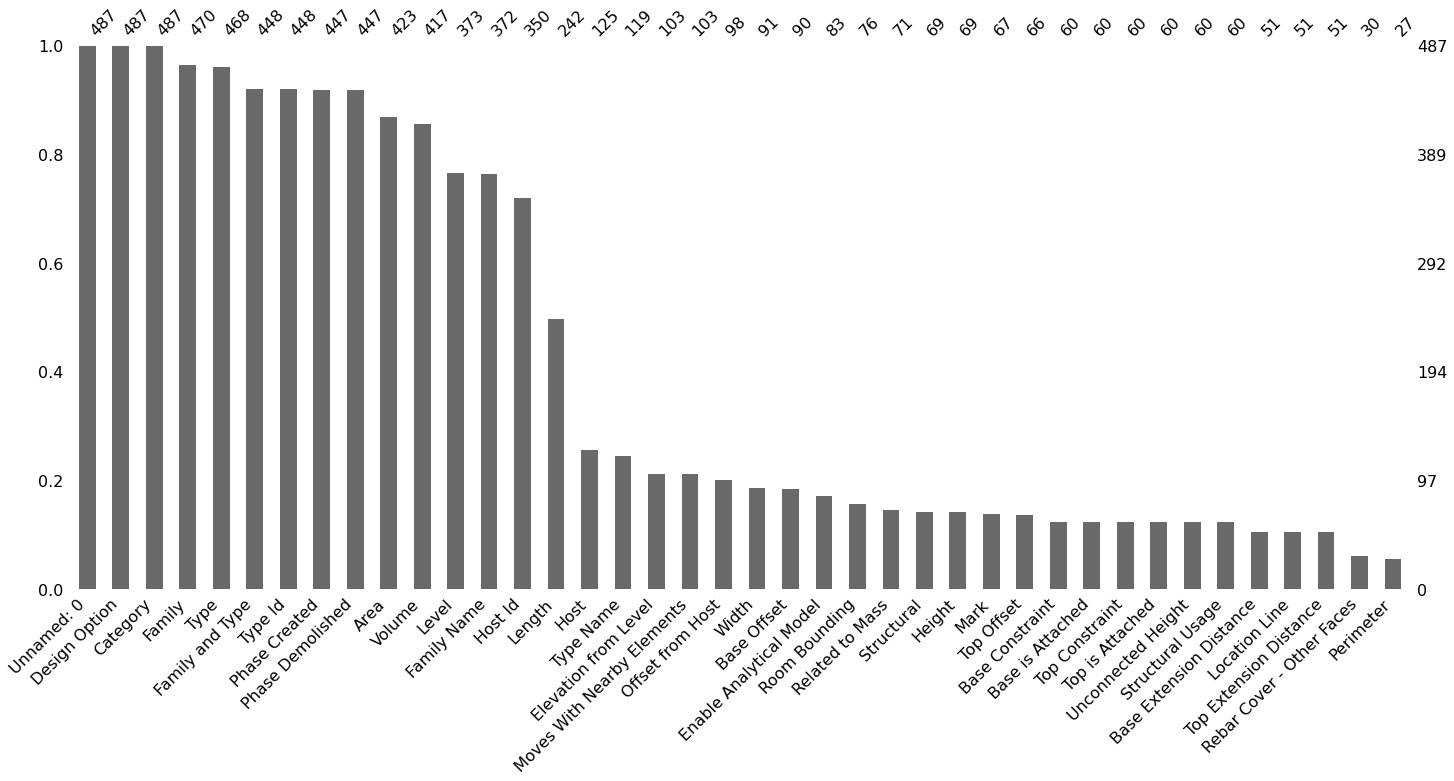

In [20]:
#Let's check if the parameters are filled in

import missingno as msno
figm2 = msno.bar(df.iloc[: , 0:40])
fig_copym2 = figm2.get_figure()
fig_copym2.savefig('plot_pr2asm.png', bbox_inches = 'tight')

# Filtering elements by "Walls" type from the project

For example, we will assume that we want to get information on the types of walls and their area in the project rac_basic_sample.rvt

![](https://DataDrivenConstruction.io/wp-content/uploads/2021/10/Dataset-3-scaled.jpg)




# Grouping project elements by any of the properties

With the help of the project dataframe (matrix),**without the need to upload our data to the SQL server**, we can group elements by any or even several element properties. 

![](https://DataDrivenConstruction.io/wp-content/uploads/2021/10/Dataset-2.jpg)

In the following example, we sort all elements of the project by the parameter "element type" and additionally sum the values for each new group of element types by volume and other values.

![](https://DataDrivenConstruction.io/wp-content/uploads/2021/10/Kopie-von-BIMEXCEL-700-x-200-px-10.png)

In the following example, we will **find all elements that have any combination of the word "wall"** in the Revit - "Type name" of elements in Project. 

*To select another property or other parameters for grouping: you can make a fork (copy) of this code and select any other property (category, comment, etc.) and specify an arbitrary expression using "*" for the grouping value.*

In [10]:
import ipywidgets as widgets


print('Select the properties you want to filter by')

volprop = ['Area', 'Volume', 'Width', 'Length', 'Perimeter']
#print('Select the properties you want to filter by')

    
def make_boxes():
    search_parameter = widgets.Combobox(
    placeholder='Select property',
    options=list(df.columns),
    description='Search property:',
    ensure_option=True,
    disabled=False
)
    search_expression = widgets.Text(
    value='*[wW]all*', 
    description='Search expression'
)
    aggregate_volume_parameter = widgets.Combobox(
    placeholder='Volume',
    options=volprop,
    description='Aggregate parameter',
    ensure_option=True,
    disabled=False
)

      
    
    return search_parameter, search_expression, aggregate_volume_parameter

search_parameter, search_expression, aggregate_volume_parameter = make_boxes()
 
widgets.HBox([search_parameter, search_expression, aggregate_volume_parameter])




Select the properties you want to filter by


In [11]:
file_name = widgets.Text(
    value='Grouped_element_wall1910.dae', 
    description='File name'
)
file_name

Text(value='Grouped_element_wall1910.dae', description='File name')

# Take-Off can be searched through the form above or selected manually through the code below

In [12]:
### '.*door*', '.*windows*', etc.
search_expression = '.*kW*'
### 'Category', 'Family', 'Host' etc.
search_parameter = 'Type Name'

### aggregate volume parameter for grouping:'Area', 'Volume', 'Width', 'Length', 'Perimeter'
aggregate_volume_parameter = 'Area'

# the name of the file with the DAE geometry after execution on the right in the "output" section
file_name = 'Grouped_element_windows.dae'


**All properties listed in the project** that can be used for grouping are listed in this list

**To select another property or other parameters** for grouping: you can make a fork (copy) of this code and select any other property (category, comment, etc.) and specify an arbitrary expression using "*" for the grouping value.

In [13]:
propstr = ['Area', 'Volume', 'Depth', 'Width', 'Length']

for el in propstr:
    df[el+'_str'] = df[el]
    
for el in propstr:
    df[el] = df[el].astype(str)
    df[el] = df[el].str.extract('(\d*.?\d*)')
    df[el] = df[el].fillna(0)
    df[el] = df[el].replace(r'n',0, regex=True)
    df[el] = df[el].astype(float)

We get a table in which the elements in the groups defined above are summed and counted.

In [14]:
df_group_byword = df[df[search_parameter].str.match(search_expression)== True]

#grouping with summation of the Area valued
df_groups_wall= df_group_byword.groupby([search_parameter])[aggregate_volume_parameter].agg(['sum', 'count'])

df_groups_wall.columns = [ ''.join(str(i) for i in col) for col in df_groups_wall.columns]
df_groups_wall = df_groups_wall.rename({'sum': 'Sum of the Areas', 'count': 'Number of elements'}, axis=1)

df_groups_wall.reset_index(inplace=True)

df_group_byword = df_group_byword.rename(columns={'Unnamed: 0': 'id'}) 
df_groups_wall

,Type Name,Sum of the Areas,Number of elements
0,11 kW,57.0,19
1,14 kW,42.0,14
2,15 kVA,0.0,3
3,177 kW,67.0,1
4,18 kW,6.0,2
5,500 kVA,5.0,1
6,600x600 - 200 Neck,0.0,5
7,600x600 - 250 Neck,0.0,108
8,7 kW,16.0,8


For clarity of the quantity, we display a graph showing the number of elements in a group.

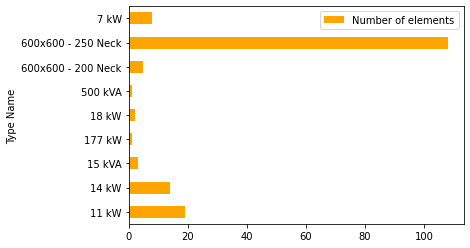

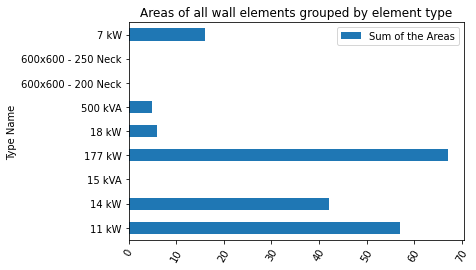

In [15]:
#import matplotlib.pyplot as pls 
import matplotlib.pyplot as plt

df_groups_wall.plot(x=search_parameter, y=["Number of elements"], kind="barh", color="orange")
df_groups_wall.plot(x=search_parameter, y=["Sum of the Areas"], kind="barh")
plt.xticks(rotation=60, horizontalalignment="center")
plt.title("Areas of all wall elements grouped by element type")
plt.rcParams["figure.figsize"] = (5, 5)


#axes = df_groups_wall.plot.bar(rot=0, subplots=True)
#axes[1].legend(loc=2) 


Additionally, we can display values for the volumes of individual elements in a group.

In [16]:
df_group_byword2 = df[df[search_parameter].str.match(search_expression)== True]

    
#grouping with summation of the Area valued
df_groups_wall2= df_group_byword.groupby([search_parameter])[aggregate_volume_parameter+"_str"].agg(['sum', 'count'])

#df_groups_wall.columns = [ ''.join(str(i) for i in col) for col in df_groups_wall.columns]
df_groups_wall2 = df_groups_wall2.rename({'sum': 'Separate areas of elements', 'count': 'Number of elements'}, axis=1)

df_groups_wall2.reset_index(inplace=True)

df_group_byword2 = df_group_byword2.rename(columns={'Unnamed: 0': 'id'}) 
df_groups_wall2

,Type Name,Separate areas of elements,Number of elements
0,11 kW,3 m²3 m²3 m²3 m²3 m²3 m²3 m²3 m²3 m²3 m²3 m²3 ...,19
1,14 kW,3 m²3 m²3 m²3 m²3 m²3 m²3 m²3 m²3 m²3 m²3 m²3 ...,14
2,15 kVA,0 m²0 m²0 m²,3
3,177 kW,67 m²,1
4,18 kW,3 m²3 m²,2
5,500 kVA,5 m²,1
6,600x600 - 200 Neck,0 m²0 m²0 m²0 m²0 m²,5
7,600x600 - 250 Neck,0 m²0 m²0 m²0 m²0 m²0 m²0 m²0 m²0 m²0 m²0 m²0 ...,108
8,7 kW,2 m²2 m²2 m²2 m²2 m²2 m²2 m²2 m²,8


# COLLADA in BIMEXCEL

As a result of executing the code, we get a separate file for a group of elements in a text version. Now we can group the resulting geometry in any options convenient for us or store it separately for each group of elements in the open DAE (collada) format, for which there are a large number of free viewers.

In [17]:
group_ids = df_group_byword.id.values
#print(group_ids)

group_ids_str = []
for el in group_ids:
    group_ids_str.append(str(el))
#group_ids_str

import os
import xml.etree.ElementTree as ET

path = '../input/geometry-rac-basic-sample'
file = 'rac_basic_sample_pr.dae'
fileObject = open(path+'/'+file, "r")
print(fileObject)

ET.register_namespace("", "http://www.collada.org/2005/11/COLLADASchema")

tree = ET.parse(fileObject)
root = tree.getroot()
#removeList = [instance_geometry]
geom_list = []

for node in root.findall('.//{http://www.collada.org/2005/11/COLLADASchema}node'):
    #print(a.attrib)
    
    if node.attrib['id'] in group_ids_str:
        url = list(node)[0].get('url')
        geom_list.append(url[1:])
        #print(1)
    else:
        #print(2)
        try:
            nd = node.find('{http://www.collada.org/2005/11/COLLADASchema}instance_geometry')
            node.remove(nd)
        except:
            0
#print(geom_list)       

for geomet in root.findall('.//{http://www.collada.org/2005/11/COLLADASchema}geometry'):
    #for el2 in geom_list:
    #print(a.attrib)
    #print(str(geomet) + str(el2))
        
    if geomet.attrib['id'] in geom_list:
        0
        #print(1)
        
    else:
        md = geomet.find('{http://www.collada.org/2005/11/COLLADASchema}mesh')
        geomet.remove(md)
        
#print(geom_list)
tree.write(file_name)

<_io.TextIOWrapper name='../input/geometry-rac-basic-sample/rac_basic_sample_pr.dae' mode='r' encoding='UTF-8'>


![](https://DataDrivenConstruction.io/wp-content/uploads/2021/10/Dataset-2-1-scaled.jpg)

![](https://DataDrivenConstruction.io/wp-content/uploads/2021/10/DataDrivenConstruction-scaled.jpg)

![](https://DataDrivenConstruction.io/wp-content/uploads/2022/03/BIm20.png)

# Choose a sample

Let's look separately at the project dataset, and what data is stored in the project dataset obtained when converting data from the Revit data file to the open format BIMEXCEL.

![](https://DataDrivenConstruction.io/wp-content/uploads/2021/10/Kopie-von-BIMEXCEL-700-x-200-px-7.png)

*To try the data, you need to register on the Kaggle platform and click on the top right button "**make a copy / start editing**"*

You can select one of the four BIMEXCEL dataframes. By default, the data in this block are **extracted for the project "rac_basic"**. To select another project, **remove the "#" character** at the beginning of the line for the selected project and put that character at the beginning of the line for the other projects.

**df2** is the dataset we will use to merge data from several projects.

In [18]:
df = pd.read_csv('../input/sample-BIMEXCEL-dataframe/rac_basic_sample_project.csv', low_memory=False)
#df = pd.read_csv('../input/sample-BIMEXCEL-dataframe/rme_advanced_sample_project.csv', low_memory=False)
#df = pd.read_csv('../input/sample-BIMEXCEL-dataframe/rst_advanced_sample_project.csv', low_memory=False)
df2 = pd.read_csv('../input/sample-BIMEXCEL-dataframe/rme_basic_sample_project.csv', low_memory=False)


In the project "rac_basic_sample" we have 448 separate elements with their unique properties

In [19]:
len(df)

448

![](https://DataDrivenConstruction.io/wp-content/uploads/2021/10/Kopie-von-BIMEXCEL-700-x-200-px-8.png)

In **df2** we put the data from the project **"rme_basic"**. This is a project that has "Mechanical, Electrical, and Plumbing" elements. In total, after converting the project into BIMEXCEL format, we got 5323 unique elements

In [20]:
len(df2)

5323

# Combining data from multiple projects
![](https://DataDrivenConstruction.io/wp-content/uploads/2021/10/Kopie-von-BIMEXCEL-700-x-200-px-9.png)



df.describe - Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution

**The "count" value in the first line** indicates the number of elements obtained using the BIMEXCEL format in the two files rac_basic_sample and rme_basic_sample

In [21]:
frames = [df, df2]
dfbig = pd.concat(frames)
dfbig.describe()

,Unnamed: 0,Offset from Host,Elevation from Level,Depth,Width,Control Panel,Digital Plate,Door,Service Panel,Switch,...,Transformer Height,Transformer Length,Transformer Width,Primary Number of Poles,Half Length,Half Width,Switchboard Height,Switchboard Length,Switchboard Width,Switch Count
count,5771.000000,3130.000000,3456.000000,239.000000,1610.000000,2.000000,1.0,6.000000,1.0,1.0,...,4.0,4.0,4.00,4.0,3.0,3.0,1.0,1.0,1.0,1.0
mean,572553.987524,1928.319169,2016.171586,182.564854,496.860248,407434.000000,677451.0,728956.000000,677432.0,137436.0,...,732.0,668.5,461.75,3.0,243.0,156.0,2286.0,762.0,965.0,5.0
std,143031.565706,1561.119839,1488.803787,125.629720,700.200921,381834.833414,NaN,125198.243751,NaN,NaN,...,714.0,367.0,301.50,0.0,0.0,0.0,NaN,NaN,NaN,NaN
min,176804.000000,-10000.000000,-10000.000000,0.000000,0.000000,137436.000000,677451.0,672522.000000,677432.0,137436.0,...,375.0,485.0,311.00,3.0,243.0,156.0,2286.0,762.0,965.0,5.0
25%,460165.500000,0.000000,460.000000,150.000000,275.000000,272435.000000,677451.0,677436.750000,677432.0,137436.0,...,375.0,485.0,311.00,3.0,243.0,156.0,2286.0,762.0,965.0,5.0
50%,522218.000000,2750.000000,2560.000000,150.000000,450.000000,407434.000000,677451.0,677451.000000,677432.0,137436.0,...,375.0,485.0,311.00,3.0,243.0,156.0,2286.0,762.0,965.0,5.0
75%,715436.500000,3050.000000,3050.000000,150.000000,600.000000,542433.000000,677451.0,682725.000000,677432.0,137436.0,...,732.0,668.5,461.75,3.0,243.0,156.0,2286.0,762.0,965.0,5.0
max,997121.000000,4238.000000,6800.000000,900.000000,25379.000000,677432.000000,677451.0,984397.000000,677432.0,137436.0,...,1803.0,1219.0,914.00,3.0,243.0,156.0,2286.0,762.0,965.0,5.0






# Information on the projects is saved in the form of a matrix
![](https://DataDrivenConstruction.io/wp-content/uploads/2021/10/Dataset-1.jpg)

To look at the data, we use the head function and display 3 lines from our project dataframe

In [22]:
df.head(3)

,Unnamed: 0,Family,Type,Host,Level,Moves With Nearby Elements,Offset from Host,Design Option,Type Name,Category,...,Automatically Embed,Curtain Panel,Join Condition,Adjust for Mullion Size,Layout,Border 1 Type,Border 2 Type,Interior Type,Rebar Cover - Exterior Face,Rebar Cover - Interior Face
0,950367,M_RPC Beetle,M_RPC Beetle,Surface,Level 1,No,600.0,None,M_RPC Beetle,OST_Entourage,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,954641,YinYin,YinYin,Level : Level 1 Living Rm.,Level 1 Living Rm.,No,0.0,None,YinYin,OST_Entourage,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,954992,YinYin,YinYin,Floor : Generic 300,Level 2,No,0.0,None,YinYin,OST_Entourage,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualization of parameter occupancy

Now with the help of the library missingno we visualize empty values in our dataset. White passes are missing data in our dataset.

<AxesSubplot:>

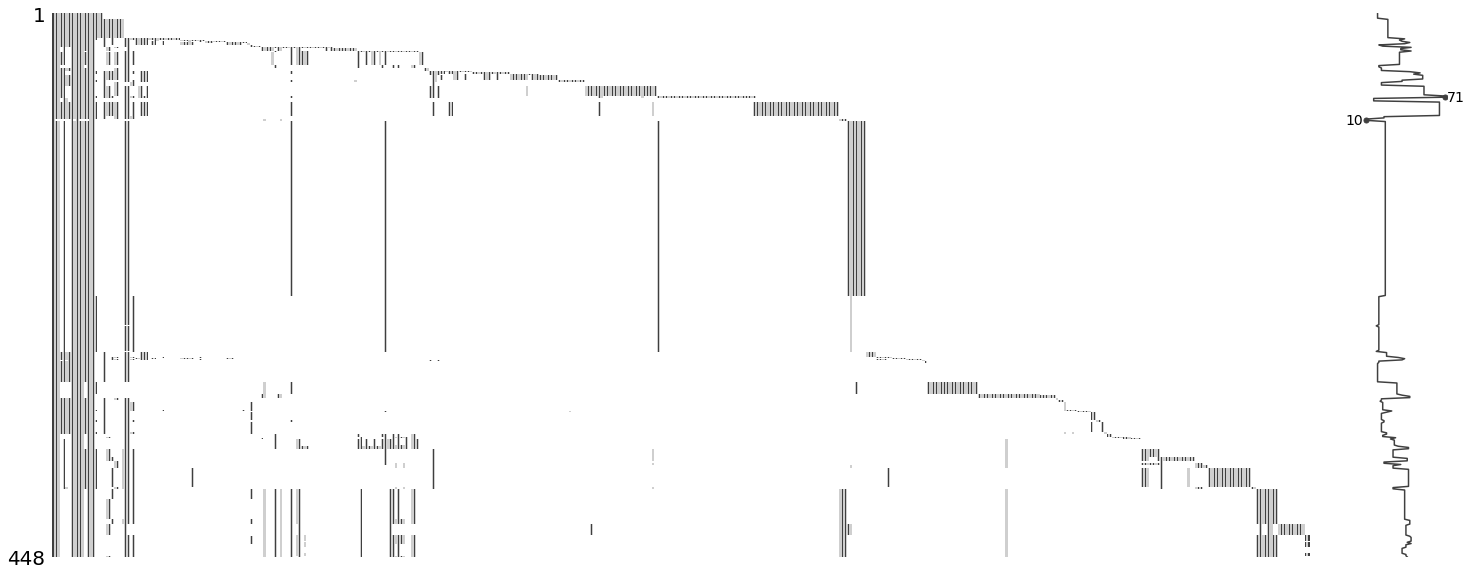

In [23]:
import missingno as msno
msno.matrix(df)

If there is a classifier or an estimate for the project, then we need to load the classifier and use automatic correlations (by codes or tables) or setting up automatic correlations to attach volume data to the items of estimates or classifiers. 


More about the DataDrivenConstruction project and the BIMEXCEL open data format: https://DataDrivenConstruction.com/

![](https://DataDrivenConstruction.io/wp-content/uploads/2021/10/Dataset-15.jpg)

# BIMEXCEL paves the way for Machine Learning
allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap. The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:

<AxesSubplot:>

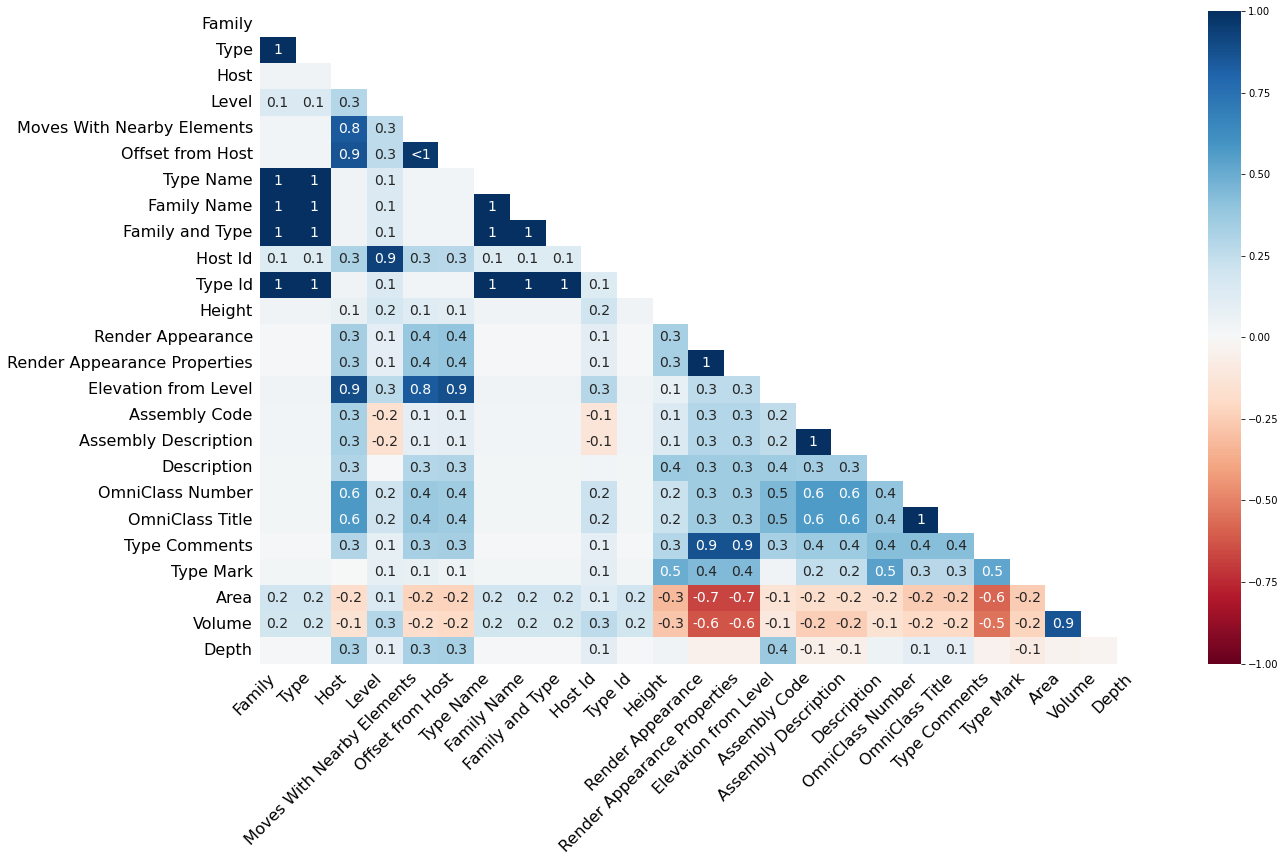

In [24]:
msno.heatmap(df.iloc[:,:30])


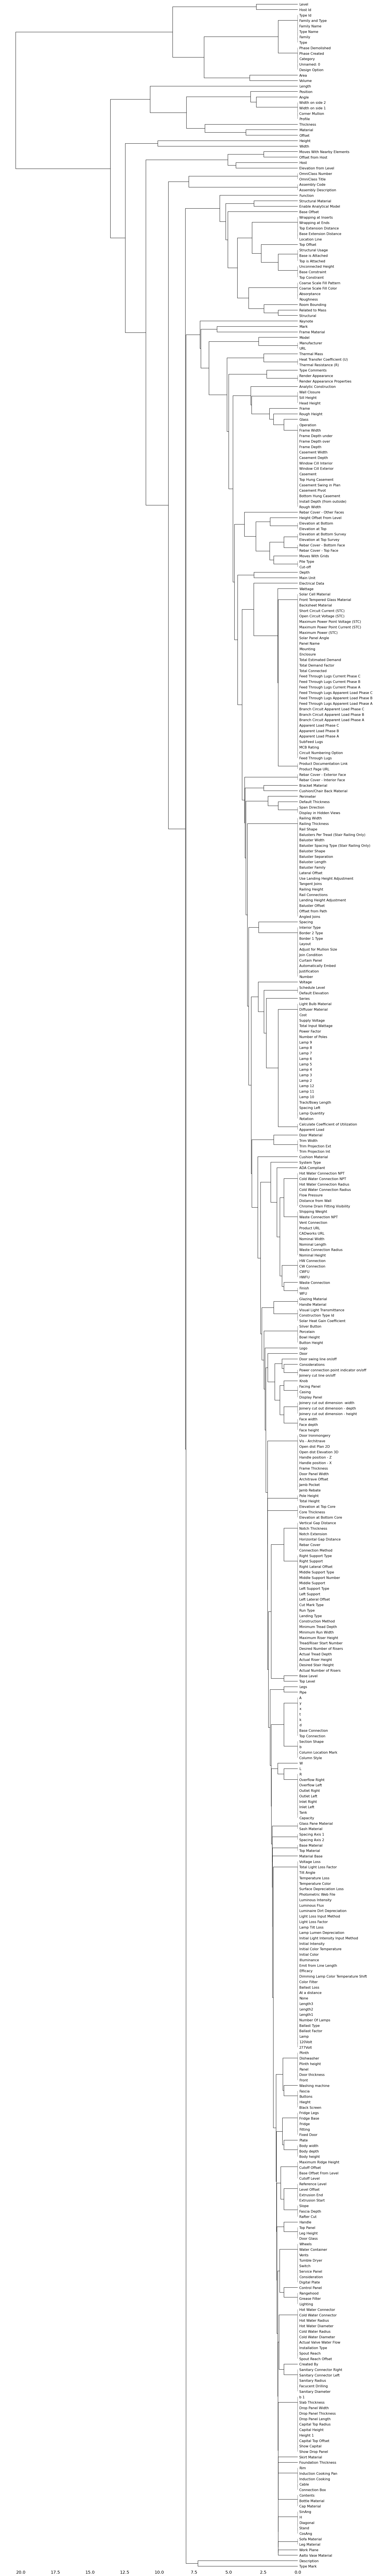

In [25]:
fig = msno.dendrogram(df)
fig_copy = fig.get_figure()
fig_copy.savefig('plot.png', bbox_inches = 'tight')

The dendrogram uses a hierarchical clustering algorithm (courtesy of scipy) to bin variables against one another by their nullity correlation (measured in terms of binary distance). At each step of the tree the variables are split up based on which combination minimizes the distance of the remaining clusters. The more monotone the set of variables, the closer their total distance is to zero, and the closer their average distance (the y-axis) is to zero.

To interpret this graph, read it from a top-down perspective. Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on. In this specific example the dendrogram glues together the variables which are required and therefore present in every record.